### What is Cache-Augmented Generation (CAG)?
CAG is a retrieval-free approach that bypasses the usual step of querying external knowledge sources at inference time. Instead, it preloads relevant documents into the LLM's extended context window, precomputes the model’s key‑value (KV) cache, and reuses this during inference—so the model can generate responses without additional retrieval steps 

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain.chat_models import init_chat_model

llm=init_chat_model("groq:openai/gpt-oss-20b")

llm

d:\RAG\AgenticAI-LangGraph\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000020D0A3B42D0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000020D0A4F1B90>, model_name='openai/gpt-oss-20b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [2]:
### Cache variable
Model_Cache={}

In [3]:
import time

def cache_model(query):
    start_time=time.time()
    if Model_Cache.get(query):
        print("**CAche Hit**")
        end_time=time.time()
        elapsed_time=end_time-start_time
        print(f"EXECUTION TIME: {elapsed_time:.2f} seconds")
        return Model_Cache.get(query)
    else:
        print("***CACHE MISS – EXECUTING MODEL***")
        start_time = time.time()
        response = llm.invoke(query)
        end_time = time.time()
        elapsed = end_time - start_time
        print(f"EXECUTION TIME: {elapsed:.2f} seconds")
        Model_Cache[query] = response
        return response


In [6]:
response=cache_model("hi")
response

**CAche Hit**
EXECUTION TIME: 0.00 seconds


AIMessage(content='Hello! 👋 How can I help you today?', additional_kwargs={'reasoning_content': 'User says "hi". We need to respond with a friendly greeting. Possibly ask how can help.'}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 72, 'total_tokens': 113, 'completion_time': 0.041369398, 'prompt_time': 0.003449039, 'queue_time': 0.1558129, 'total_time': 0.044818437, 'completion_tokens_details': {'reasoning_tokens': 21}}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_a12402de73', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--3619fad1-0f78-4c58-bcac-85303b942ad2-0', usage_metadata={'input_tokens': 72, 'output_tokens': 41, 'total_tokens': 113})

In [5]:
Model_Cache

{'hi': AIMessage(content='Hello! 👋 How can I help you today?', additional_kwargs={'reasoning_content': 'User says "hi". We need to respond with a friendly greeting. Possibly ask how can help.'}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 72, 'total_tokens': 113, 'completion_time': 0.041369398, 'prompt_time': 0.003449039, 'queue_time': 0.1558129, 'total_time': 0.044818437, 'completion_tokens_details': {'reasoning_tokens': 21}}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_a12402de73', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--3619fad1-0f78-4c58-bcac-85303b942ad2-0', usage_metadata={'input_tokens': 72, 'output_tokens': 41, 'total_tokens': 113})}

In [7]:
response=cache_model("hi")
response

**CAche Hit**
EXECUTION TIME: 0.00 seconds


AIMessage(content='Hello! 👋 How can I help you today?', additional_kwargs={'reasoning_content': 'User says "hi". We need to respond with a friendly greeting. Possibly ask how can help.'}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 72, 'total_tokens': 113, 'completion_time': 0.041369398, 'prompt_time': 0.003449039, 'queue_time': 0.1558129, 'total_time': 0.044818437, 'completion_tokens_details': {'reasoning_tokens': 21}}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_a12402de73', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--3619fad1-0f78-4c58-bcac-85303b942ad2-0', usage_metadata={'input_tokens': 72, 'output_tokens': 41, 'total_tokens': 113})

In [8]:
query="can you give me 500 words on langgraph?"
response =cache_model(query)
print(response)

***CACHE MISS – EXECUTING MODEL***
EXECUTION TIME: 1.95 seconds
content='**LangGraph: Building Language‑Model Applications with Graph‑Based Architecture**\n\nLangGraph is a cutting‑edge framework released by the LangChain team that reimagines how we compose, orchestrate, and deploy language‑model (LLM) applications. Instead of the traditional linear “prompt‑then‑response” pipeline, LangGraph treats every step of an LLM workflow as a node in a directed graph. This paradigm shift brings modularity, observability, and scalability to the forefront, enabling developers to build complex, multi‑step reasoning engines that can be easily debugged, extended, and deployed.\n\n---\n\n### Core Concepts\n\n| Component | Description |\n|-----------|-------------|\n| **Node** | A self‑contained unit of computation. A node can be a prompt, a function call, a data fetch, or any LLM inference step. |\n| **Edge** | The flow of data between nodes. Edges can carry text, structured JSON, or even arbitrary Py

In [9]:
query="can you give me 500 words on langgraph?"
response =cache_model(query)
print(response)

**CAche Hit**
EXECUTION TIME: 0.00 seconds
content='**LangGraph: Building Language‑Model Applications with Graph‑Based Architecture**\n\nLangGraph is a cutting‑edge framework released by the LangChain team that reimagines how we compose, orchestrate, and deploy language‑model (LLM) applications. Instead of the traditional linear “prompt‑then‑response” pipeline, LangGraph treats every step of an LLM workflow as a node in a directed graph. This paradigm shift brings modularity, observability, and scalability to the forefront, enabling developers to build complex, multi‑step reasoning engines that can be easily debugged, extended, and deployed.\n\n---\n\n### Core Concepts\n\n| Component | Description |\n|-----------|-------------|\n| **Node** | A self‑contained unit of computation. A node can be a prompt, a function call, a data fetch, or any LLM inference step. |\n| **Edge** | The flow of data between nodes. Edges can carry text, structured JSON, or even arbitrary Python objects. |\n| **

In [10]:
query="give me 500 words on langgraph?"
response =cache_model(query)
print(response)

***CACHE MISS – EXECUTING MODEL***
EXECUTION TIME: 1.80 seconds
content='**LangGraph: The Next‑Generation Toolkit for Building LLM‑Powered Applications**\n\nLangGraph is a lightweight, open‑source framework designed to make it easy to build, orchestrate, and debug complex workflows that combine large language models (LLMs) with external data sources, APIs, and custom logic. Think of it as the “Apache Airflow” for language‑model pipelines: it lets you describe a graph of nodes (functions, prompts, or calls to external services), specify the data that flows between them, and run the whole thing with a single command. Below is a deep dive into what LangGraph offers, why it matters, and how you can get started.\n\n---\n\n### 1. Why LangGraph Exists\n\nTraditional LLM applications are often built as monolithic scripts. While this works for quick experiments, it quickly becomes brittle as the number of prompts, retrieval steps, and decision points grows. LangGraph addresses three pain points

### Advanced CAG

In [12]:
from __future__ import annotations
from typing import TypedDict, List, Optional
import time

# ---- LangGraph / LangChain ----
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import MemorySaver

from langchain_core.documents import Document
from langchain.chat_models import init_chat_model
from langchain_huggingface import HuggingFaceEmbeddings

# ---- FAISS vector stores ----
import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore

In [13]:
# ================= CONFIG =================
EMBED_MODEL = "sentence-transformers/all-MiniLM-L6-v2"  # 384-dim
VECTOR_DIM = 384

LLM_MODEL = "groq:openai/gpt-oss-20b"

LLM_TEMPERATURE = 0

RETRIEVE_TOP_K = 4
CACHE_TOP_K = 3

CACHE_DISTANCE_THRESHOLD = 0.45

# Optional TTL for cache entries (seconds). 0 = disabled.
CACHE_TTL_SEC = 0


In [14]:
# ================= STATE ==================
class RAGState(TypedDict):
    question: str
    normalized_question: str
    context_docs: List[Document]
    answer: Optional[str]
    citations: List[str]
    cache_hit: bool

In [15]:
# ============== GLOBALS ===================
from langchain_huggingface import HuggingFaceEmbeddings
EMBED = HuggingFaceEmbeddings(model_name=EMBED_MODEL)

In [16]:
# ----- QA CACHE (EMPTY, SAFE INIT) -----
qa_index = faiss.IndexFlatL2(VECTOR_DIM)  # distance; lower is better
QA_CACHE = FAISS(
    embedding_function=EMBED,
    index=qa_index,
    docstore=InMemoryDocstore({}),
    index_to_docstore_id={}
)

In [ ]:
QA_CACHE

# this is an empty faiss vector store

In [18]:
# ----- RAG STORE (demo only) -----
RAG_STORE = FAISS.from_texts(
    texts=[
        "LangGraph lets you compose stateful LLM workflows as graphs.",
        "In LangGraph, nodes can be cached; node caching memoizes outputs keyed by inputs for a TTL.",
        "Retrieval-Augmented Generation (RAG) retrieves external context and injects it into prompts.",
        "Semantic caching reuses prior answers when new questions are semantically similar."
    ],
    embedding=EMBED,
)

In [19]:
LLM = init_chat_model(model=LLM_MODEL, temperature=LLM_TEMPERATURE)

In [20]:
LLM


ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000020DCFA32ED0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000020DCFA32DD0>, model_name='openai/gpt-oss-20b', temperature=1e-08, model_kwargs={}, groq_api_key=SecretStr('**********'))

In [23]:
# ================ NODES ===================
def normalize_query(state: RAGState) -> RAGState:
    q = (state["question"] or "").strip()
    state["normalized_question"] = q.lower()
    return state

def semantic_cache_lookup(state: RAGState) -> RAGState:
    q = state["normalized_question"]
    state["cache_hit"] = False  # default

    if not q:
        return state

    # ✅ Guard: FAISS crashes if ntotal == 0 and you ask for k>0
    if getattr(QA_CACHE, "index", None) is None or QA_CACHE.index.ntotal == 0:
        return state

    # For FAISS L2 wrapper, this returns (Document, distance) with lower=better
    hits = QA_CACHE.similarity_search_with_score(q, k=CACHE_TOP_K)
    if not hits:
        return state

    best_doc, dist = hits[0]

    # Optional TTL
    if CACHE_TTL_SEC > 0:
        ts = best_doc.metadata.get("ts")
        if ts is None or (time.time() - float(ts)) > CACHE_TTL_SEC:
            return state

    # L2 distance gate (lower = more similar)
    if dist <= CACHE_DISTANCE_THRESHOLD:
        cached_answer = best_doc.metadata.get("answer")
        if cached_answer:
            state["answer"] = cached_answer
            state["citations"] = ["(cache)"]
            state["cache_hit"] = True

    return state

def respond_from_cache(state: RAGState) -> RAGState:
    return state

def retrieve(state: RAGState) -> RAGState:
    q = state["normalized_question"]
    docs = RAG_STORE.similarity_search(q, k=RETRIEVE_TOP_K)
    state["context_docs"] = docs
    return state

def generate(state: RAGState) -> RAGState:
    q = state["question"]
    docs = state.get("context_docs", [])
    ctx = "\n\n".join([f"[doc-{i}] {d.page_content}" for i, d in enumerate(docs, start=1)])

    system = (
        "You are a precise RAG assistant. Use the context when helpful. "
        # "Cite with [doc-i] markers if you use a fact from the context."
    )
    user = f"Question: {q}\n\nContext:\n{ctx}\n\nWrite a concise answer with citations."

    resp = LLM.invoke([{"role": "system", "content": system},
                       {"role": "user", "content": user}])
    state["answer"] = resp.content
    state["citations"] = [f"[doc-{i}]" for i in range(1, len(docs) + 1)]
    return state

def cache_write(state: RAGState) -> RAGState:
    q = state["normalized_question"]
    a = state.get("answer")
    if not q or not a:
        return state

    QA_CACHE.add_texts(
        texts=[q],
        metadatas=[{
            "answer": a,
            "ts": time.time(),
        }]
    )
    return state

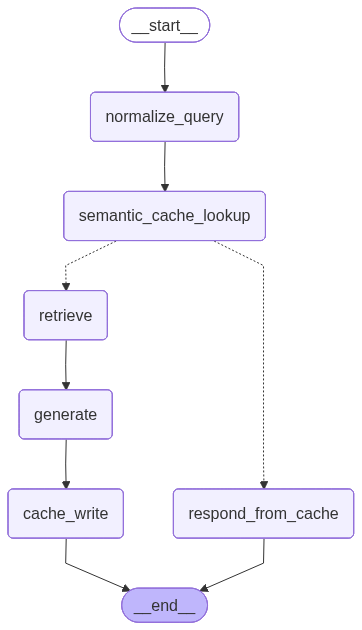

In [24]:
# ============== GRAPH WIRING ==============
graph = StateGraph(RAGState)

graph.add_node("normalize_query", normalize_query)
graph.add_node("semantic_cache_lookup", semantic_cache_lookup)
graph.add_node("respond_from_cache", respond_from_cache)
graph.add_node("retrieve", retrieve)
graph.add_node("generate", generate)
graph.add_node("cache_write", cache_write)

graph.set_entry_point("normalize_query")
graph.add_edge("normalize_query", "semantic_cache_lookup")

def _branch(state: RAGState) -> str:
    return "respond_from_cache" if state.get("cache_hit") else "retrieve"

graph.add_conditional_edges(
    "semantic_cache_lookup",
    _branch,
    {
        "respond_from_cache": "respond_from_cache",
        "retrieve": "retrieve"
    }
)

graph.add_edge("respond_from_cache", END)
graph.add_edge("retrieve", "generate")
graph.add_edge("generate", "cache_write")
graph.add_edge("cache_write", END)

memory = MemorySaver()
app = graph.compile(checkpointer=memory)
app

In [25]:
# ================= DEMO ===================
if __name__ == "__main__":
    thread_cfg = {"configurable": {"thread_id": "demo-user-1"}}

    q1 = "What is LangGraph ?"
    out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
    print("Answer:", out1["answer"])
    print("Citations:", out1.get("citations"))
    print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph is a framework that lets you build stateful LLM workflows as directed graphs, where each node can be cached (memoizing outputs keyed by inputs for a TTL) to improve efficiency. It enables modular, reusable LLM pipelines that can incorporate retrieval‑augmented generation and semantic caching techniques.【doc‑2】【doc‑1】
Citations: ['[doc-1]', '[doc-2]', '[doc-3]', '[doc-4]']
Cache hit?: False


In [26]:
q1 = "Explain about LangGraph ?"
out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
print("Answer:", out1["answer"])
print("Citations:", out1.get("citations"))
print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph is a framework that lets you build stateful LLM workflows as directed graphs, where each node can be cached (memoizing outputs keyed by inputs for a TTL) to improve efficiency. It enables modular, reusable LLM pipelines that can incorporate retrieval‑augmented generation and semantic caching techniques.【doc‑2】【doc‑1】
Citations: ['(cache)']
Cache hit?: True


In [27]:
q1 = "Explain about LangGraph agents ?"
out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
print("Answer:", out1["answer"])
print("Citations:", out1.get("citations"))
print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph agents are stateful LLM workflows built as directed graphs, where each node represents a step (e.g., prompt, retrieval, or transformation) that can be cached for efficiency【doc-2】【doc-1】. The framework supports Retrieval‑Augmented Generation (RAG), allowing agents to fetch external context and inject it into prompts【doc-3】. Additionally, LangGraph can employ semantic caching to reuse prior answers when new queries are semantically similar, further speeding up responses【doc-4】.
Citations: ['[doc-1]', '[doc-2]', '[doc-3]', '[doc-4]']
Cache hit?: False


In [28]:
q1 = "Explain about agents in Langgraph ?"
out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
print("Answer:", out1["answer"])
print("Citations:", out1.get("citations"))
print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph agents are stateful LLM workflows built as directed graphs, where each node represents a step (e.g., prompt, retrieval, or transformation) that can be cached for efficiency【doc-2】【doc-1】. The framework supports Retrieval‑Augmented Generation (RAG), allowing agents to fetch external context and inject it into prompts【doc-3】. Additionally, LangGraph can employ semantic caching to reuse prior answers when new queries are semantically similar, further speeding up responses【doc-4】.
Citations: ['(cache)']
Cache hit?: True
